In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('/Users/macbookpro/Downloads/Purwadika/Capstone 2/Database/Supermarket Customers.csv', delimiter='\t')
pd.options.display.max_colwidth = 200
pd.options.display.max_columns = 9999

In [10]:
df[df['Response'] == 1]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
15,2114,1946,PhD,Single,82800.0,0,0,24-11-2012,23,1006,22,115,59,68,45,1,7,6,12,3,0,0,1,1,0,0,3,11,1
33,7373,1952,PhD,Divorced,46610.0,0,2,29-10-2012,8,96,12,96,33,22,43,6,4,1,6,6,0,0,0,0,0,0,3,11,1
39,2968,1943,PhD,Divorced,48948.0,0,0,01-02-2013,53,437,8,206,160,49,42,2,7,10,5,6,1,0,0,0,0,0,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2194,7118,1957,Graduation,Married,73803.0,0,1,01-08-2012,61,833,80,363,52,26,174,2,9,5,6,6,1,0,0,0,0,0,3,11,1
2198,2632,1954,Graduation,Married,50501.0,1,1,18-06-2013,10,297,0,38,13,0,152,7,5,4,4,6,1,0,0,0,0,0,3,11,1
2202,11133,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,3,50,4,3,42,5,7,1,6,8,0,0,0,0,0,0,3,11,1
2221,7366,1982,Master,Single,75777.0,0,0,04-07-2013,12,712,26,538,69,13,80,1,3,6,11,1,0,1,1,0,0,0,3,11,1


In [6]:
df.groupby('Education')['Income'] # Mean umur tiap2 usertype

In [4]:
# untuk mengisi NaN Value pada
y = df['Income'] = df['Income'].fillna(df['Income'].median())
y.head(11)

0     58138.0
1     46344.0
2     71613.0
3     26646.0
4     58293.0
5     62513.0
6     55635.0
7     33454.0
8     30351.0
9      5648.0
10    52247.0
Name: Income, dtype: float64

In [12]:
y.size

2240

In [26]:
# Hitung jumlah unik, total, dan persentase untuk 'Marital_Status'
marital_status_summary = df['Marital_Status'].value_counts().reset_index()
marital_status_summary.columns = ['Marital_Status', 'Total']
marital_status_summary['Percentage'] = (marital_status_summary['Total'] / len(df)) * 100

display(marital_status_summary)


,Marital_Status,Total,Percentage
0,Married,864,38.588656
1,Together,579,25.859759
2,Single,480,21.438142
3,Divorced,232,10.361769
4,Widow,77,3.439035
5,Alone,3,0.133988
6,Absurd,2,0.089326
7,YOLO,2,0.089326


In [25]:
# Hitung jumlah unik, total, dan persentase untuk 'Education'
education_summary = df['Education'].value_counts().reset_index()
education_summary.columns = ['Education', 'Total']
education_summary['Percentage'] = (education_summary['Total'] / len(df)) * 100

display(education_summary)


,Education,Total,Percentage
0,Graduation,1126,50.290308
1,PhD,486,21.706119
2,Master,370,16.525234
3,2n Cycle,203,9.066548
4,Basic,54,2.411791


In [18]:
# Get Data With Numerical Columns
df_num = df.select_dtypes(include=['int64', 'float64'])
len(df_num.columns)

26

/Users/macbookpro/Downloads/Purwadika/Syllabus/Visual Code/M_2_Practice/.venv/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
/Users/macbookpro/Downloads/Purwadika/Syllabus/Visual Code/M_2_Practice/.venv/lib/python3.9/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


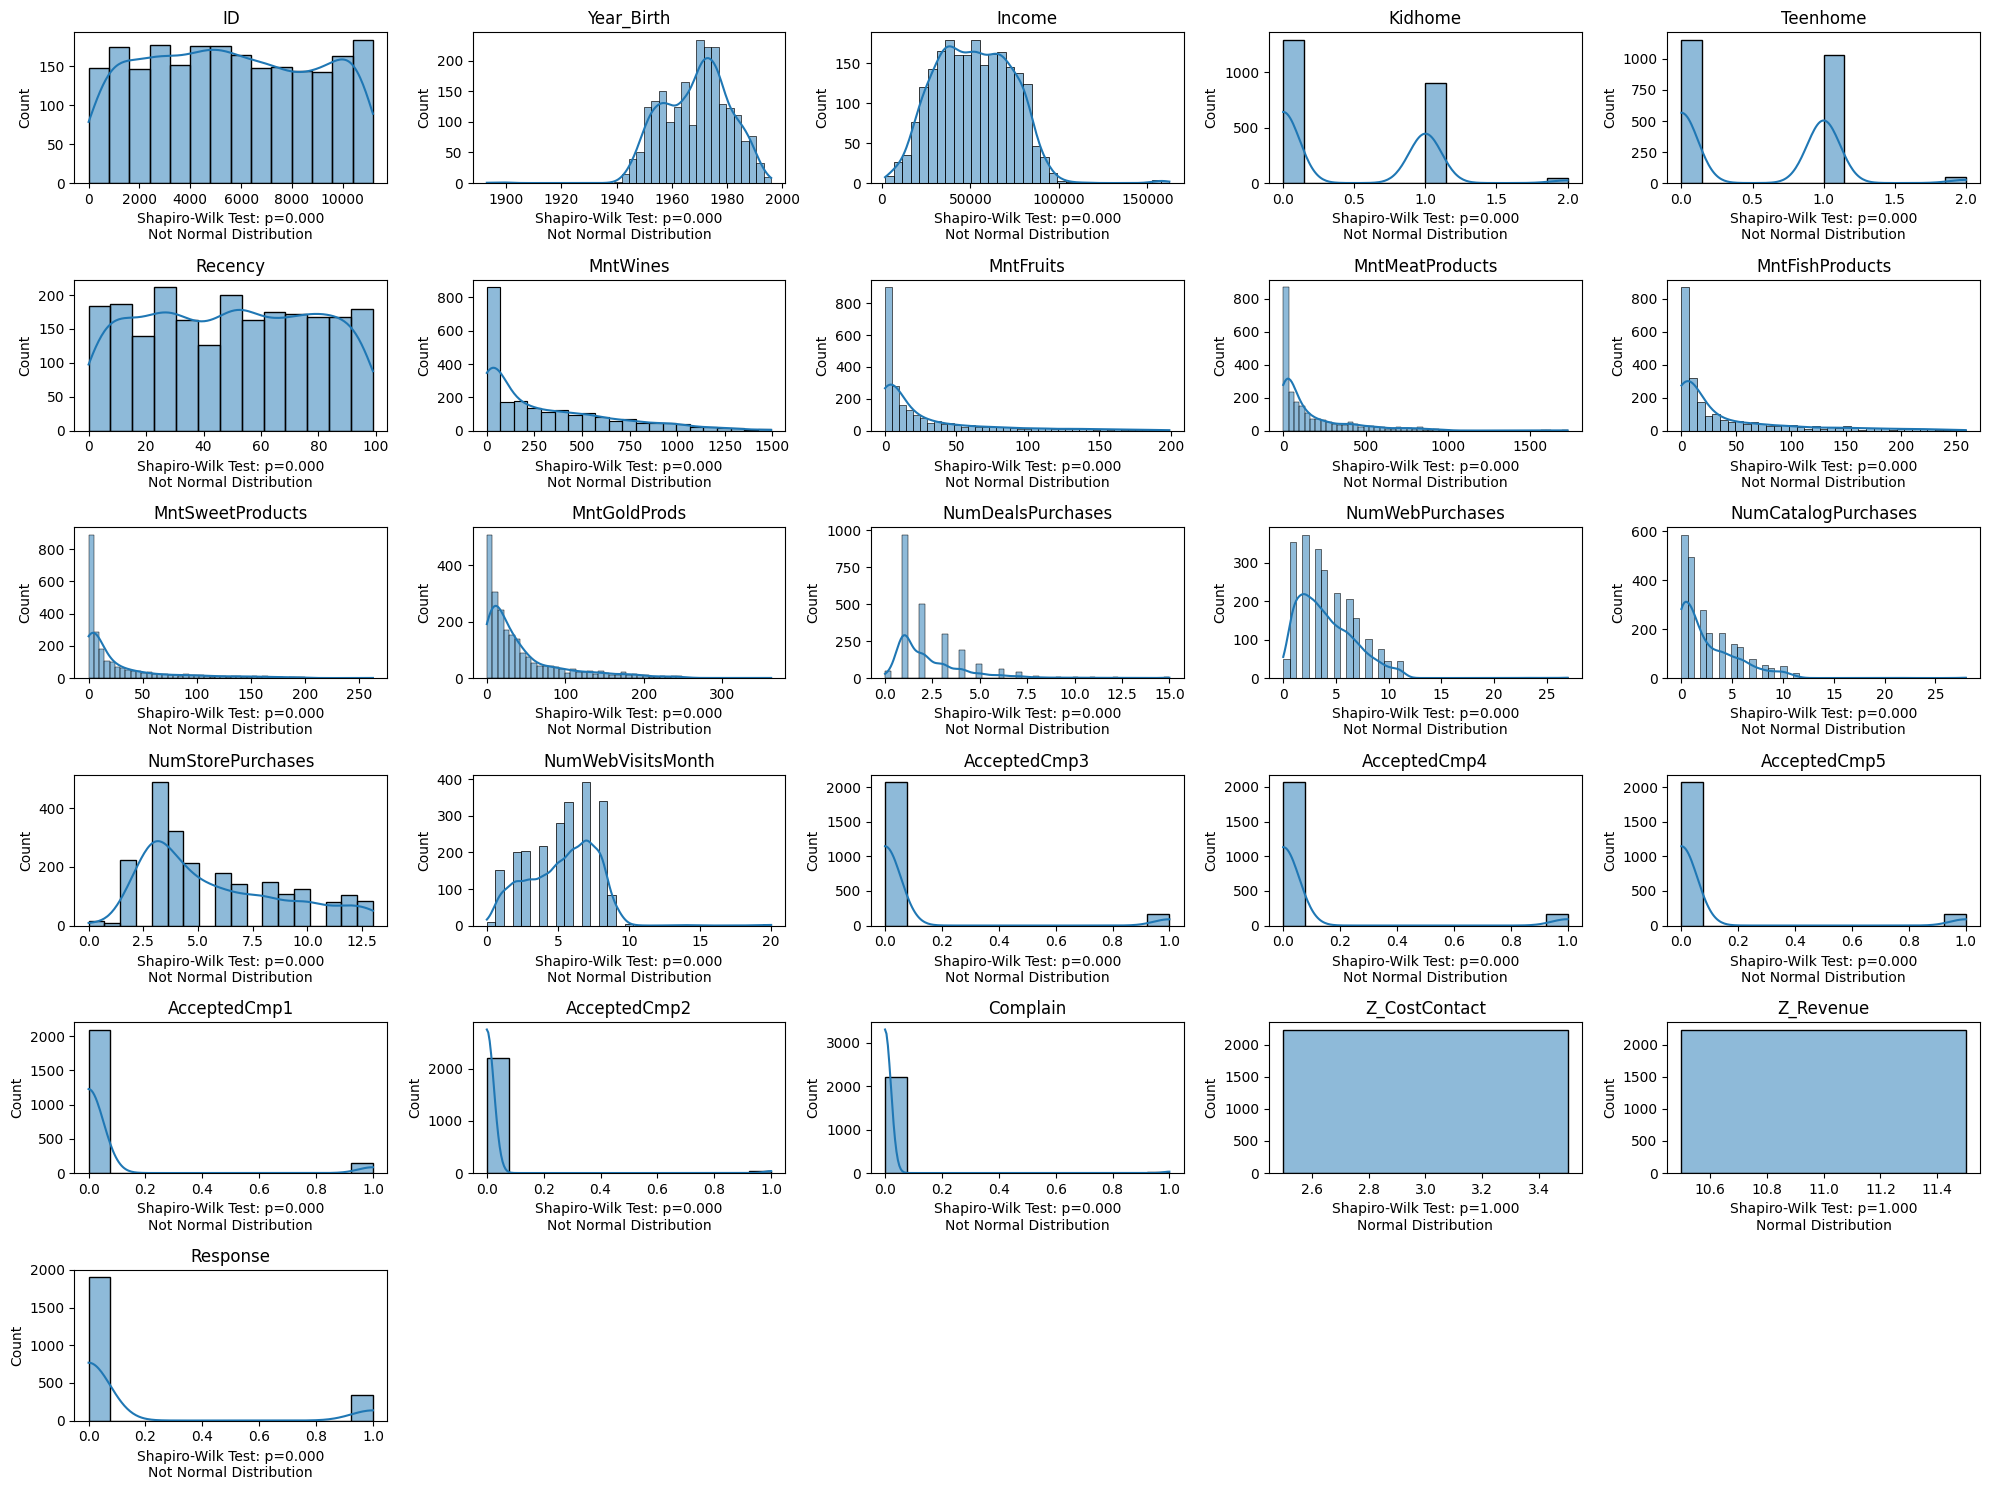

In [22]:
from scipy.stats import shapiro

# Misalkan 'df' adalah DataFrame Anda
columns = ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
           'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
           'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
           'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
           'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
           'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
           'Z_Revenue', 'Response']

# Membuat grid subplot
fig, axes = plt.subplots(6, 5, figsize=(20, 15))

# Meratakan array axes untuk iterasi yang mudah
axes = axes.flatten()

# Melakukan uji Shapiro-Wilk untuk setiap kolom dan membuat histogram
for i, column in enumerate(columns):
    ax = axes[i]
    # Cek apakah kolom adalah numerik; jika tidak, skip uji Shapiro-Wilk
    if pd.api.types.is_numeric_dtype(df[column]):
        sns.histplot(data=df, x=column, kde=True, label=column, ax=ax)
        ax.set_title(column)

        # Melakukan uji Shapiro-Wilk
        stat, p = shapiro(df[column].dropna())  # Memastikan tidak ada NaN

        if p > 0.05:
            ax.set_xlabel(f"Shapiro-Wilk Test: p={p:.3f}\nNormal Distribution")
        else:
            ax.set_xlabel(f"Shapiro-Wilk Test: p={p:.3f}\nNot Normal Distribution")
    else:
        ax.set_xlabel("Non-numeric data")

# Menghapus subplot yang tidak digunakan
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Menyesuaikan tata letak dan menampilkan plot
plt.tight_layout()
plt.show()


In [2]:
# untuk mengisi NaN Value pada

from sklearn.impute import KNNImputer

knn_imputer = KNNImputer(n_neighbors=3)
df[['Income']] = knn_imputer.fit_transform(df[['Income']]).round()
df.head(11)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,0,6,1,1,13,1,1,0,0,20,1,0,0,0,0,0,3,11,0


In [3]:
# Menghitung jumlah total ID
total_ids = df['ID'].count()

# Menghitung jumlah ID dengan Recency di atas 30
above_30 = df.loc[df['Recency'] > 30, 'ID'].count()

# Menghitung jumlah ID dengan Recency di bawah atau sama dengan 30
below_30 = df.loc[df['Recency'] <= 30, 'ID'].count()

# Menghitung persentase
percentage_above_30 = (above_30 / total_ids) * 100
percentage_below_30 = (below_30 / total_ids) * 100

# Menampilkan hasil
print(f"Persentase User dengan Recency di atas 30 hari : {percentage_above_30:.2f}%")
print(f"Persentase User dengan Recency di bawah atau sama dengan 30 hari: {percentage_below_30:.2f}%")


Persentase User dengan Recency di atas 30 hari : 67.68%
Persentase User dengan Recency di bawah atau sama dengan 30 hari: 32.32%


In [24]:
print(f'The data contains {len(df.columns)} columns and {len(df)} rows, of which there are {df.duplicated().sum()} duplicate data.')
print("Data Sample:")
df.sample(10)

The data contains 28 columns and 2236 rows, of which there are 0 duplicate data.
Data Sample:


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalPurchases
1753,5092,1949,PhD,Widow,51569.0,0,1,12-02-2013,39,380,0,47,6,0,34,4,7,1,7,8,0,1,0,0,0,0,1,467
2197,10722,1973,Graduation,Married,55593.0,0,1,21-08-2013,63,293,8,124,11,4,106,2,6,6,3,6,1,0,0,0,0,0,0,546
1211,7192,1955,Graduation,Married,65748.0,0,1,15-04-2013,58,172,73,93,95,78,34,2,2,4,10,1,0,0,0,0,0,1,0,545
399,8213,1980,2n Cycle,Married,14515.0,1,0,09-11-2012,71,6,4,9,6,36,35,4,2,2,3,7,0,0,0,0,0,0,1,96
816,2986,1976,Graduation,Married,30772.0,1,1,12-03-2014,89,7,2,4,2,1,4,1,1,0,2,6,0,0,0,0,0,0,0,20
1754,2154,1971,Graduation,Widow,30372.0,1,1,25-12-2012,33,15,0,12,7,3,7,3,2,0,3,7,0,0,0,0,0,0,0,44
1361,1384,1992,Basic,Married,17256.0,1,0,23-11-2013,10,6,4,14,8,8,22,2,2,1,2,8,1,0,0,0,0,0,0,62
235,89,1975,2n Cycle,Married,22212.0,1,0,09-12-2013,49,5,9,20,6,8,21,2,2,0,4,6,0,0,0,0,0,0,0,69
167,3712,1959,Graduation,Divorced,52332.0,0,0,28-08-2013,63,212,5,33,7,0,2,1,3,2,6,4,0,1,0,0,0,0,0,259
887,8086,1959,Graduation,Married,42243.0,1,1,11-12-2013,34,48,0,2,0,0,5,2,2,0,3,7,0,0,0,0,0,0,0,55


In [36]:
display(df['Recency'].max(), df['Recency'].min())

np.int64(99)

np.int64(0)

In [58]:
df[df['ID']==0]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
214,0,1985,Graduation,Married,70951.0,0,0,04-05-2013,66,239,10,554,254,87,54,1,3,4,9,1,0,0,0,0,0,0,3,11,0,29


In [3]:
filtered_df = df[(df['Response'] == 1) & (df['AcceptedCmp5'] == 0) & (df['AcceptedCmp4'] == 0) & (df['AcceptedCmp3'] == 0) & (df['AcceptedCmp2'] == 0) & (df['AcceptedCmp1'] == 0)]
filtered_df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
33,7373,1952,PhD,Divorced,46610.0,0,2,29-10-2012,8,96,...,6,0,0,0,0,0,0,3,11,1
46,9909,1996,2n Cycle,Married,7500.0,0,0,09-11-2012,24,3,...,9,0,0,0,0,0,0,3,11,1
56,10383,1966,Graduation,Divorced,70287.0,0,0,02-04-2013,30,295,...,3,0,0,0,0,0,0,3,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2139,2715,1966,Master,Divorced,29435.0,1,1,06-08-2012,11,70,...,9,0,0,0,0,0,0,3,11,1
2160,5667,1964,PhD,Married,60896.0,0,1,11-10-2012,90,1013,...,6,0,0,0,0,0,0,3,11,1
2190,4418,1983,Master,Single,89616.0,0,0,25-02-2013,36,671,...,2,0,0,0,0,0,0,3,11,1
2202,11133,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,...,8,0,0,0,0,0,0,3,11,1


In [4]:
len(df.loc[df['Income'].isna()])

24

In [8]:
df.sort_values(by='Income', ascending=False).head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0
617,1503,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,1,16,2,1,2,0,0,0,1,1,0,0,0,0,0,0,3,11,0
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,16,1622,17,3,4,15,0,28,1,0,0,0,0,0,0,0,3,11,0
1300,5336,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,1,9,2,0,8,0,1,0,1,1,0,0,0,0,0,0,3,11,0
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,2,1582,1,2,1,15,0,22,0,0,0,0,0,0,0,0,3,11,0


In [25]:
display(df.describe(), df.describe(include=object))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalPurchases
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.00000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,5589.008497,1968.898032,51952.614043,0.444097,0.506708,49.116279,304.12746,26.275939,166.983453,37.536225,27.080501,43.983005,2.326029,4.087657,2.663238,5.795617,5.318873,0.072898,0.074687,0.072451,0.064401,0.013417,0.008945,0.149374,605.986583
std,3244.826887,11.703281,21411.466851,0.538459,0.544609,28.957284,336.59181,39.724007,225.689645,54.648562,41.299504,52.061568,1.933032,2.779988,2.923898,3.251129,2.426886,0.260027,0.262944,0.259291,0.245520,0.115077,0.094173,0.356536,601.865156
min,0.000000,1940.000000,1730.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,2828.250000,1959.000000,35502.500000,0.000000,0.000000,24.000000,24.00000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.000000
50%,5454.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.00000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,396.500000
75%,8421.750000,1977.000000,68275.750000,1.000000,1.000000,74.000000,504.25000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1045.500000
max,11191.000000,1996.000000,162397.000000,2.000000,2.000000,99.000000,1493.00000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2525.000000


,Education,Marital_Status,Dt_Customer
count,2236,2236,2236
unique,5,4,663
top,Graduation,Married,31-08-2012
freq,1126,1442,12


In [6]:
# Menampilkan jumlah baris dan kolom dari dataset
print(f'Jumlah baris dan kolom: {df.shape}')

# Memberikan penilaian awal terhadap dataset
pd.DataFrame({
    'Type': df.dtypes,
    'N/A (%)': df.isna().mean() * 100,
    'Unique': df.nunique(),
    'Sample': [df[col].unique() for col in df.columns]
})

Jumlah baris dan kolom: (2240, 29)


,Type,N/A (%),Unique,Sample
ID,int64,0.000000,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710,..."
Year_Birth,int64,0.000000,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 197..."
Education,object,0.000000,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
Marital_Status,object,0.000000,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
Income,float64,1.071429,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, nan, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 5860..."
Kidhome,int64,0.000000,3,"[0, 1, 2]"
Teenhome,int64,0.000000,3,"[0, 1, 2]"
Dt_Customer,object,0.000000,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-..."
Recency,int64,0.000000,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 2..."
MntWines,int64,0.000000,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 650, 1..."


In [3]:
yy = df[df['Recency'] > 30]
yy

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,65,164,50,49,27,4,7,3,7,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,10,56,3,1,23,2,4,0,4,8,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2234,8372,1974,Graduation,Married,34421.0,1,0,01-07-2013,81,3,3,7,6,2,9,1,1,0,2,7,0,0,0,0,0,0,3,11,0
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0


In [4]:
xx = df[df['Recency'] < 30]
xx

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,42,98,0,42,14,2,6,4,10,6,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,0,24,3,3,2,1,3,0,2,9,0,0,0,0,0,0,3,11,1
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2222,10659,1979,2n Cycle,Together,7500.0,1,0,07-05-2013,7,2,8,11,3,8,21,4,3,2,2,7,0,0,0,0,0,0,3,11,0
2224,4286,1970,PhD,Single,57642.0,0,1,09-01-2014,24,580,6,58,8,0,27,3,7,6,6,4,1,0,0,0,0,0,3,11,0
2229,10084,1972,Graduation,Married,24434.0,2,0,18-05-2014,9,3,2,8,20,0,17,2,2,1,2,7,0,0,0,0,0,0,3,11,0
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0


In [10]:
q = abs(1562/2240*100)
w = abs(692/2240*100)
display(q, w)
print(q+w)

69.73214285714285

30.892857142857146

100.625


In [11]:
rangeofdata = df.copy()
rangeofdata['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

print(f'this data contain data from {rangeofdata.Dt_Customer.min()} until {rangeofdata.Dt_Customer.max()}')

this data contain data from 2012-07-30 00:00:00 until 2014-06-29 00:00:00


In [5]:
current_year = pd.to_datetime(rangeofdata.Dt_Customer.max()).year
df['Age'] = current_year - df['Year_Birth']

NameError: name 'rangeofdata' is not defined

In [23]:
null_count = df['Age'].isnull().sum()
null_count

np.int64(0)

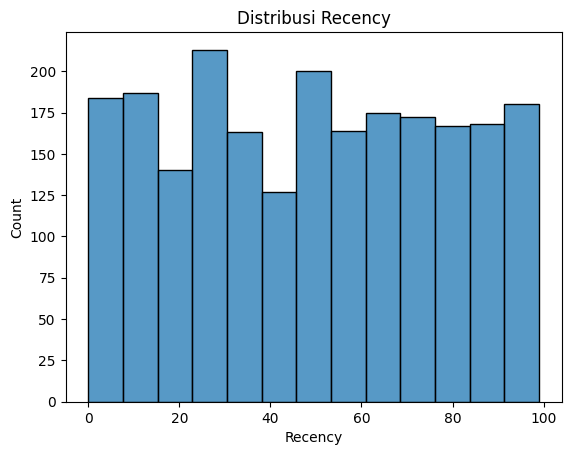

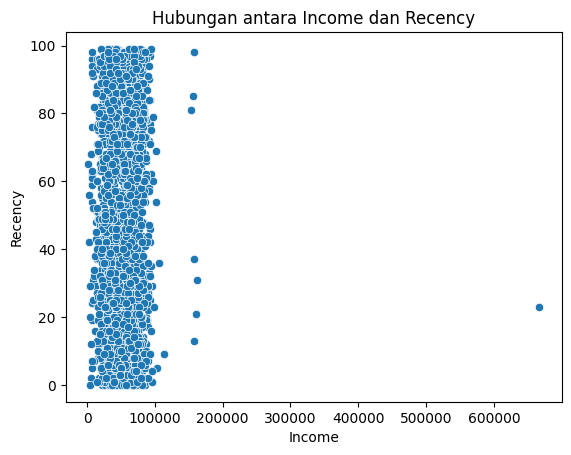

In [13]:
# Distribusi kolom Recency
sns.histplot(data=df, x='Recency')
plt.title('Distribusi Recency')
plt.show()

# Hubungan antara Income dan Recency
sns.scatterplot(data=df, x='Income', y='Recency')
plt.title('Hubungan antara Income dan Recency')
plt.show()


In [14]:
df['Income'] = df['Income'].fillna(df['Income'].median())

In [21]:
df = df[df['Income'] != 666666]

In [18]:
df['Marital_Status'] = df['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single')
df['Marital_Status'] = df['Marital_Status'].replace('Together', 'Married')

In [19]:
df = df[df['Year_Birth'] > 1900]

In [20]:
df = df.drop(columns=['Z_CostContact', 'Z_Revenue'])

In [21]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
dtype: int64

In [5]:
df.describe()
df['Recency'].skew()
#df['Recency'].kurtosis()


np.float64(-0.0019866586335935076)

In [6]:
from scipy.stats import shapiro

stat, p = shapiro(df['Recency'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Statistics=0.954, p=0.000
Sample does not look Gaussian (reject H0)


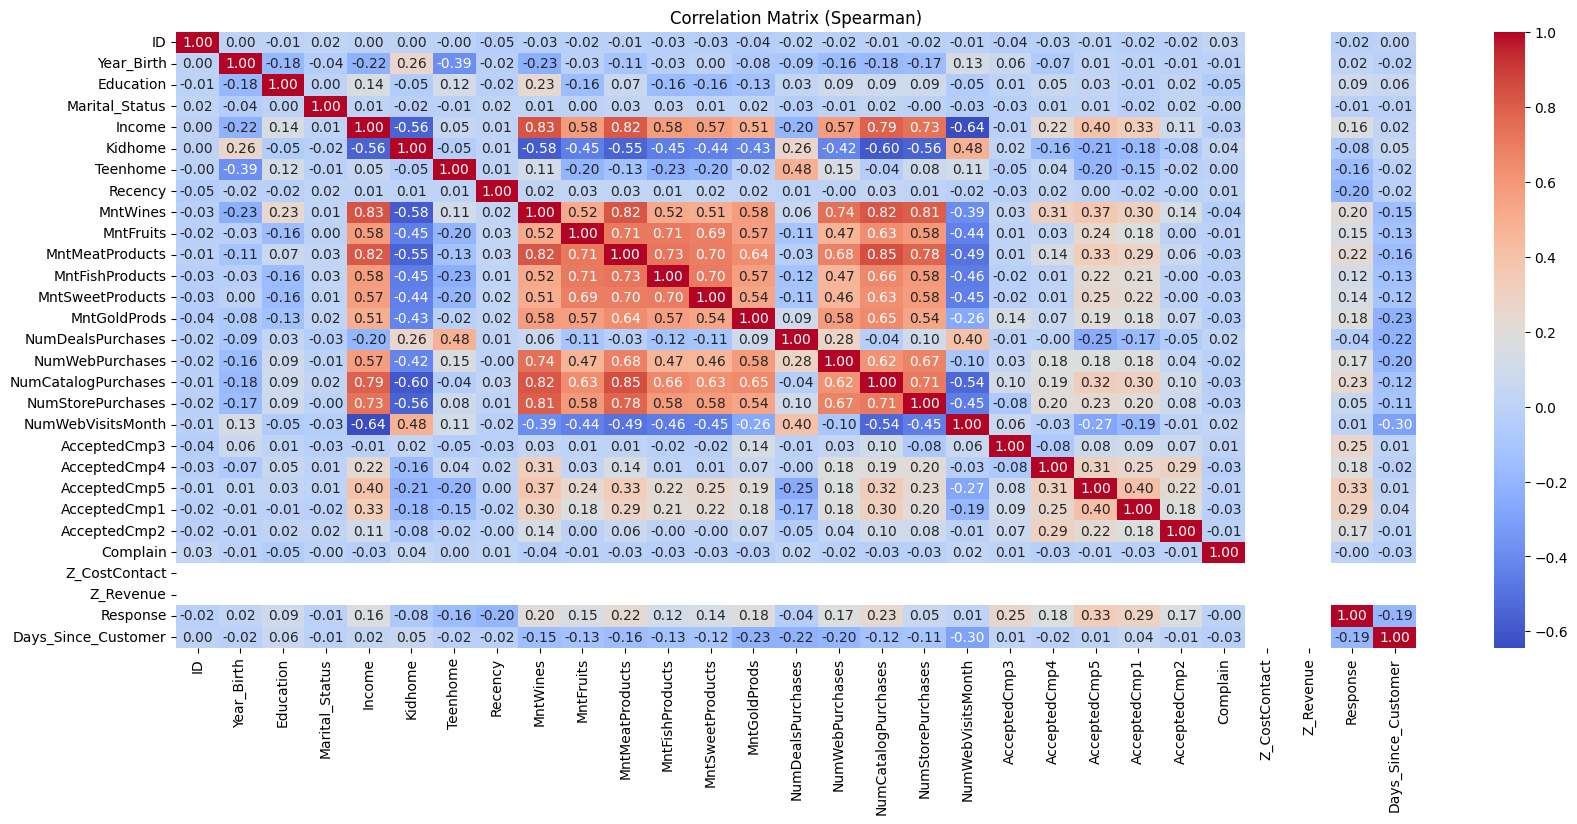

In [18]:
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Mengubah kolom Dt_Customer menjadi tipe datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

# Menghitung jumlah hari sejak tanggal minimal
reference_date = df['Dt_Customer'].min()
df['Days_Since_Customer'] = (df['Dt_Customer'] - reference_date).dt.days

# Memilih kolom numerik
numeric_df = df.select_dtypes(include=['number'])

# Memilih kolom kategorikal
categorical_df = df.select_dtypes(include=['object'])

# Melakukan Label Encoding pada kolom kategorikal
label_encoders = {}
for col in categorical_df.columns:
    le = LabelEncoder()
    categorical_df[col] = le.fit_transform(categorical_df[col])
    label_encoders[col] = le

# Menggabungkan kembali kolom numerik dan kategorikal yang sudah di-encode
encoded_df = pd.concat([numeric_df, categorical_df], axis=1)

# Menghitung matriks korelasi menggunakan metode Spearman
corr_matrix_spearman = encoded_df.corr(method='spearman')


plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Spearman)')
plt.show()


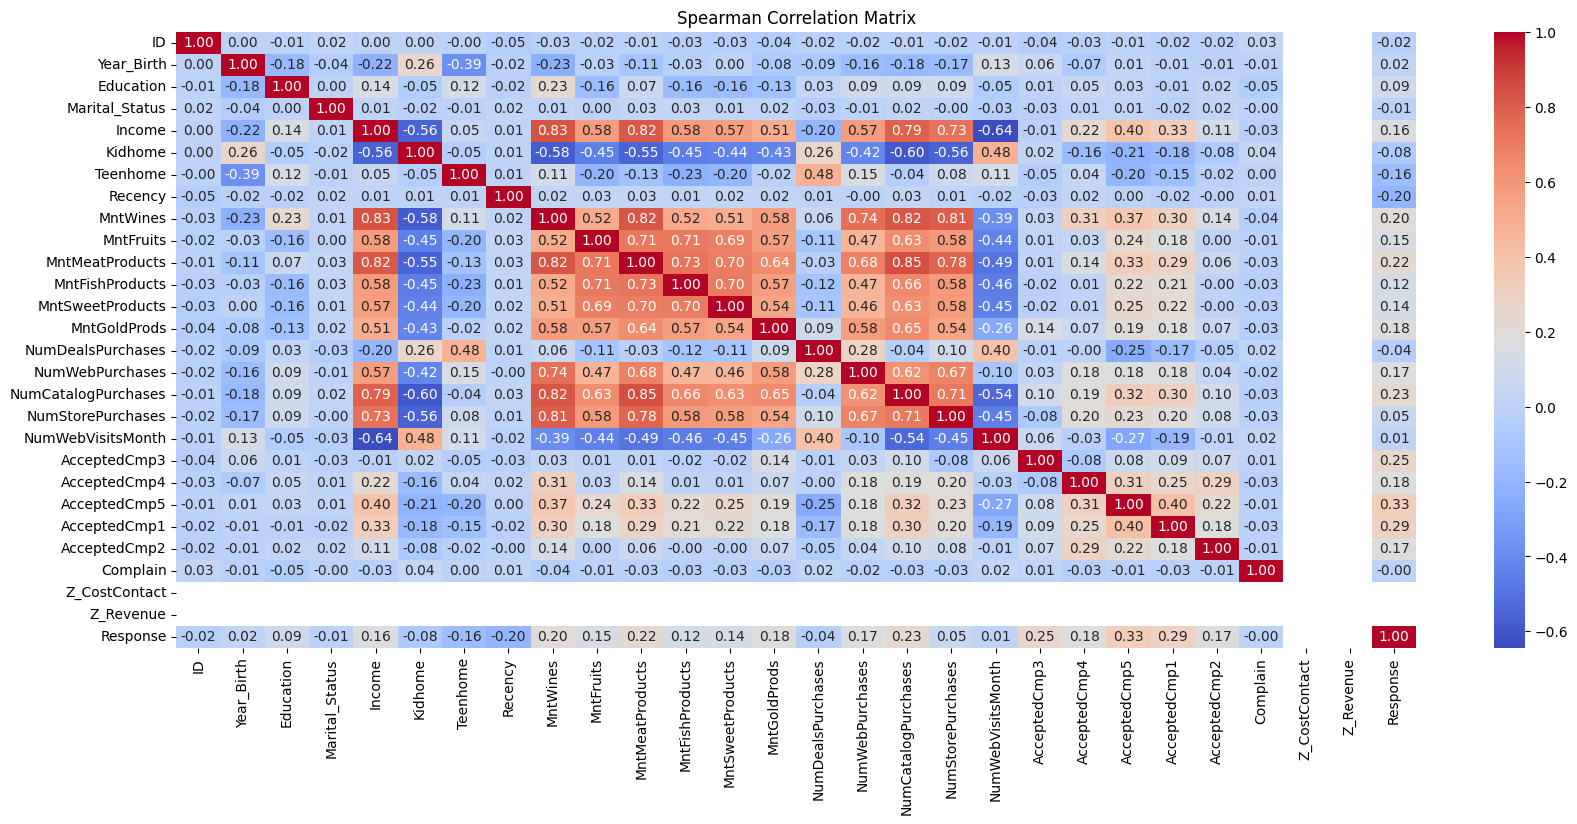

In [17]:
from sklearn.preprocessing import LabelEncoder
# Melakukan Label Encoding pada kolom kategorikal
label_encoder = LabelEncoder()
df['Education'] = label_encoder.fit_transform(df['Education'])
df['Marital_Status'] = label_encoder.fit_transform(df['Marital_Status'])

# Memilih hanya kolom numerik
numeric_df = df.select_dtypes(include=['number'])

# Menghitung matriks korelasi menggunakan metode Spearman
corr_matrix_spearman = numeric_df.corr(method='spearman')

# Membuat heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix')
plt.show()

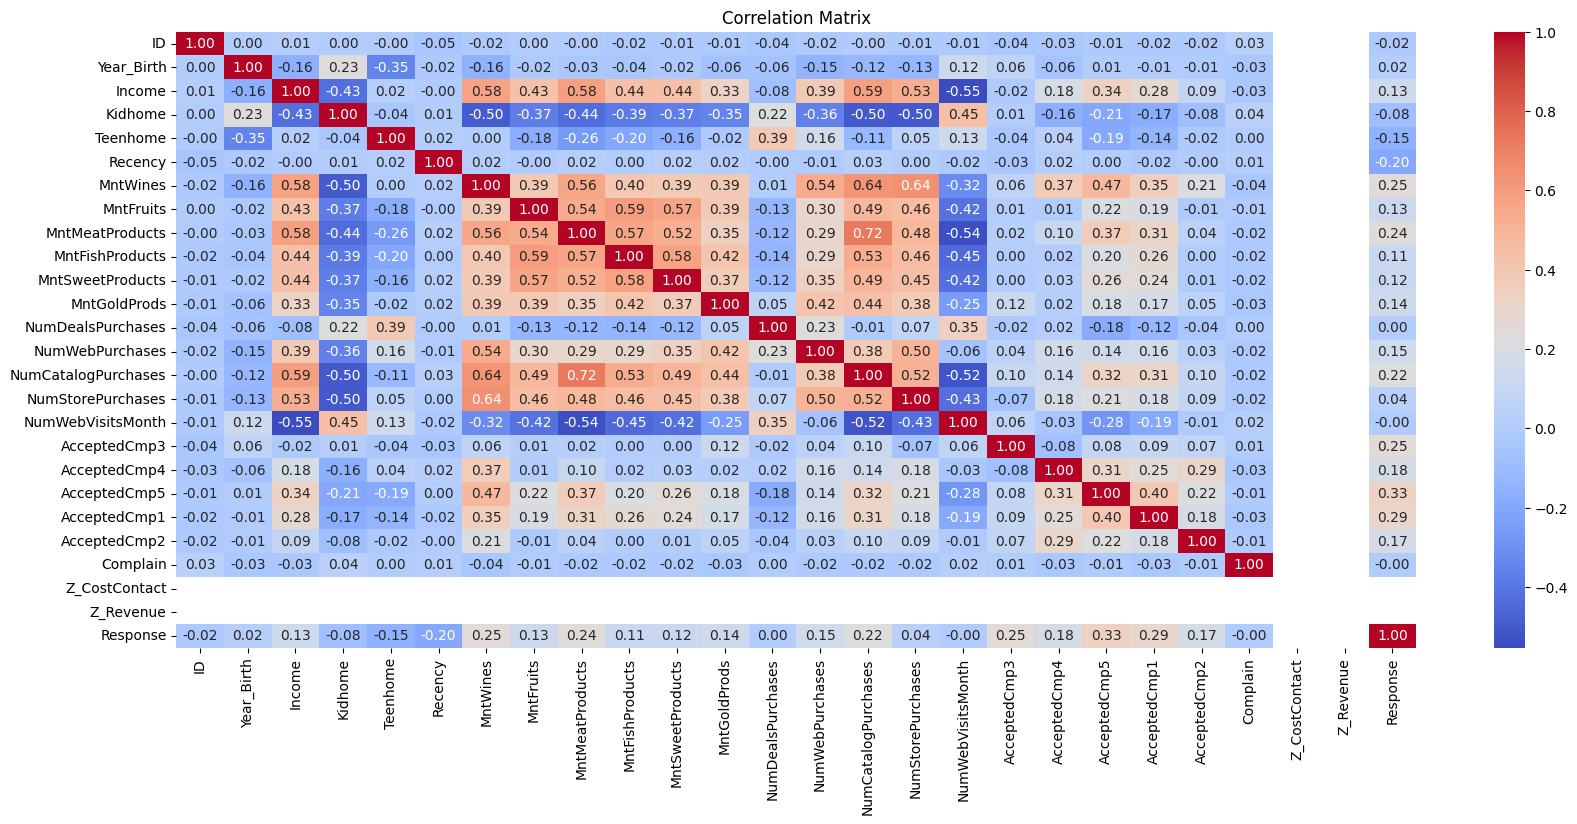

In [13]:
# Memilih hanya kolom numerik
numeric_df = df.select_dtypes(include=['number'])

# Menghitung matriks korelasi
corr_matrix = numeric_df.corr()

plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


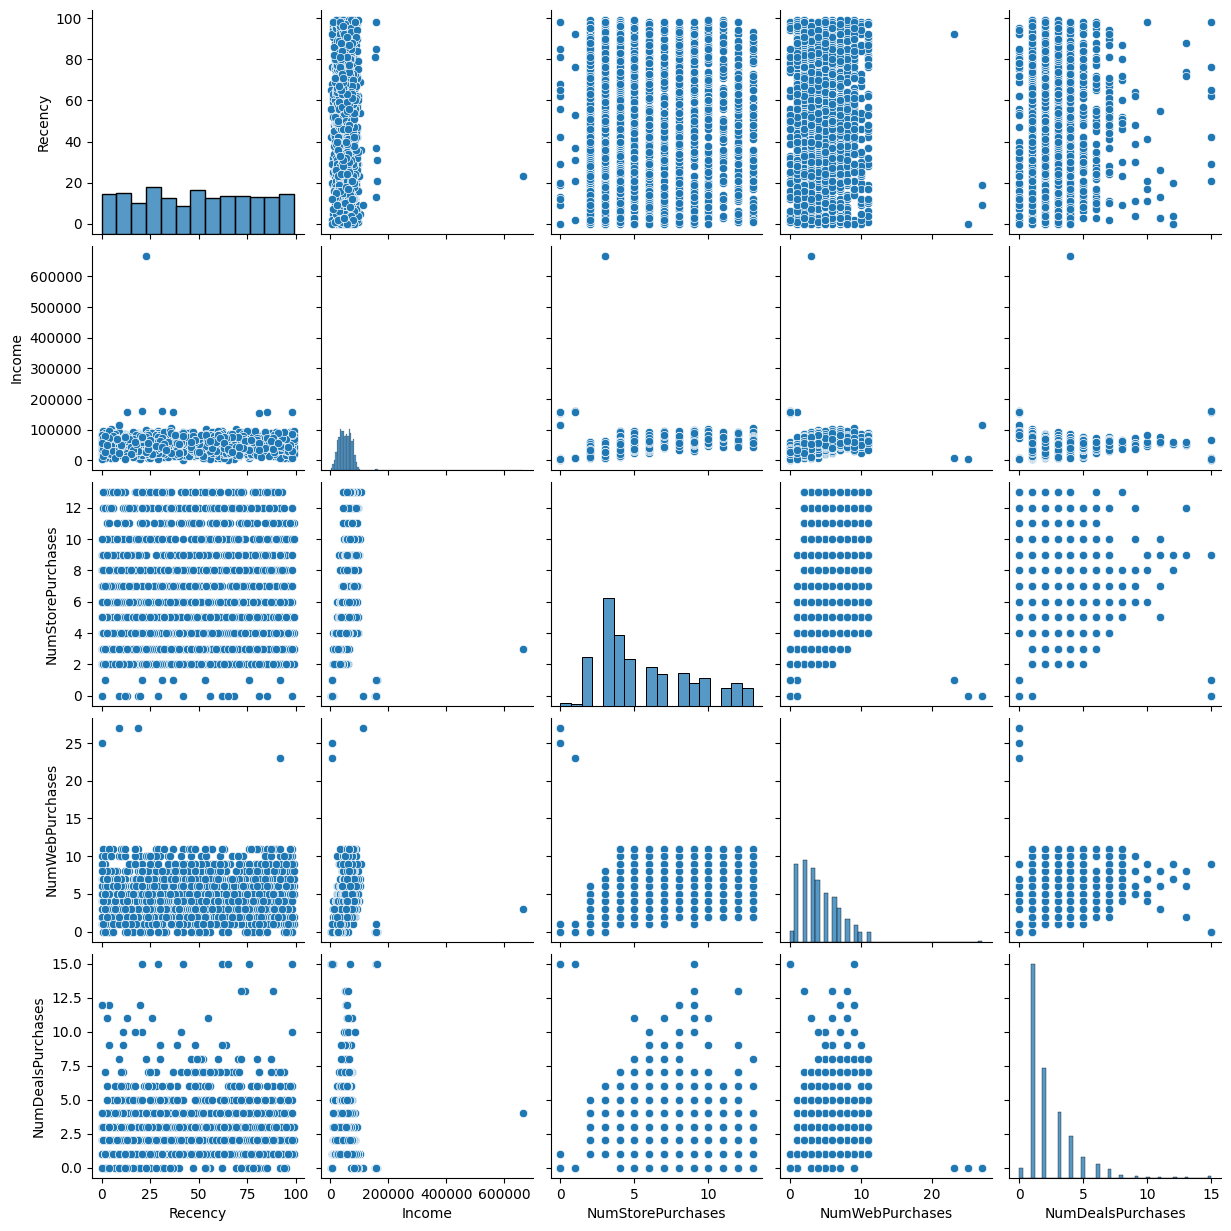

In [10]:
sns.pairplot(df[['Recency', 'Income', 'NumStorePurchases', 'NumWebPurchases', 'NumDealsPurchases']])
plt.show()


In [19]:
from scipy.stats import ttest_ind, f_oneway

group1 = df[df['Education'] == 'Graduation']['Recency']
group2 = df[df['Education'] == 'Master']['Recency']
t_stat, p_val = ttest_ind(group1, group2)
print('T-statistic: %.3f, P-value: %.3f' % (t_stat, p_val))


T-statistic: nan, P-value: nan


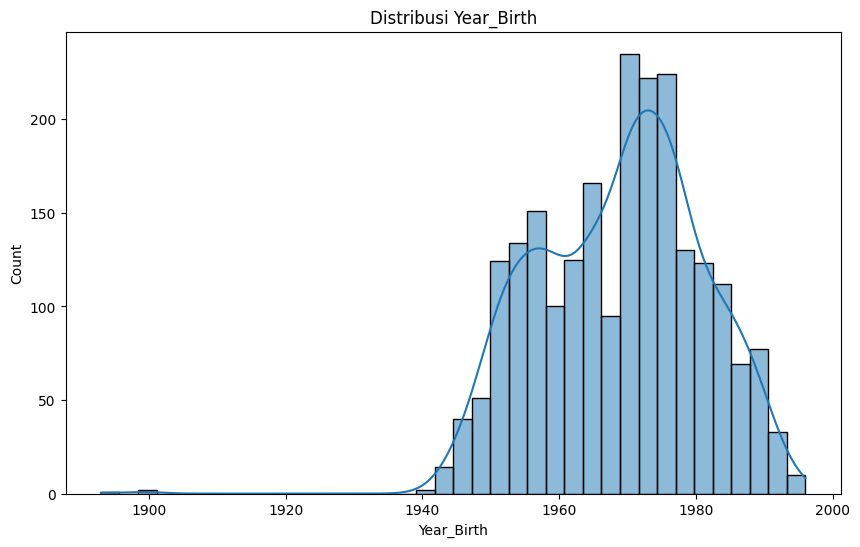

In [4]:
# Distribusi kolom Year_Birth
plt.figure(figsize=(10,6))
sns.histplot(df['Year_Birth'], kde=True)
plt.title('Distribusi Year_Birth')
plt.show()

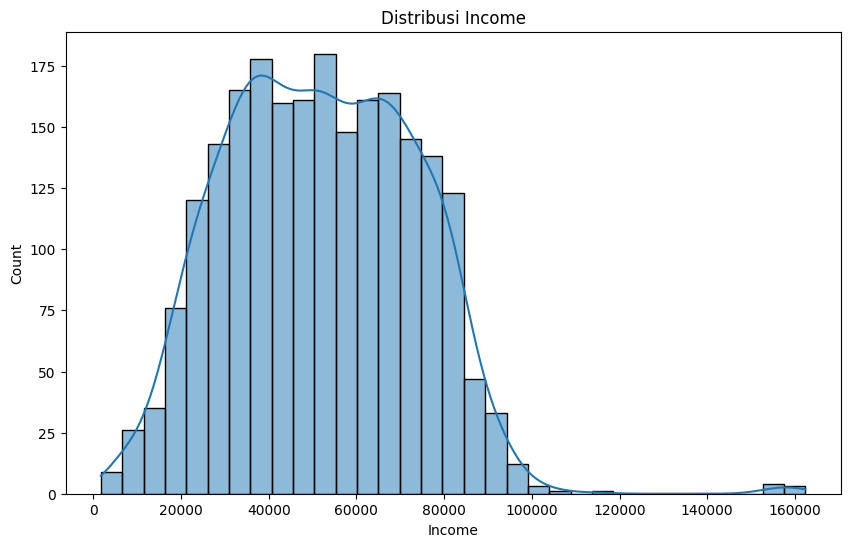

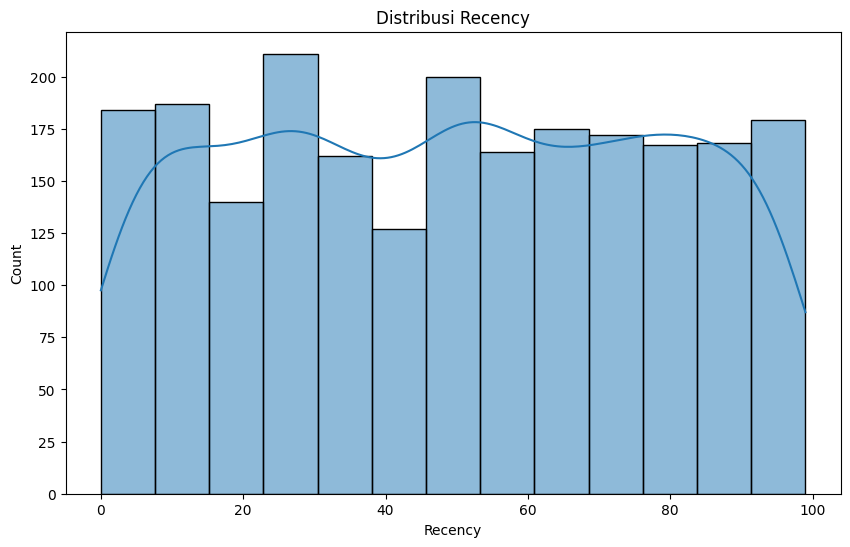

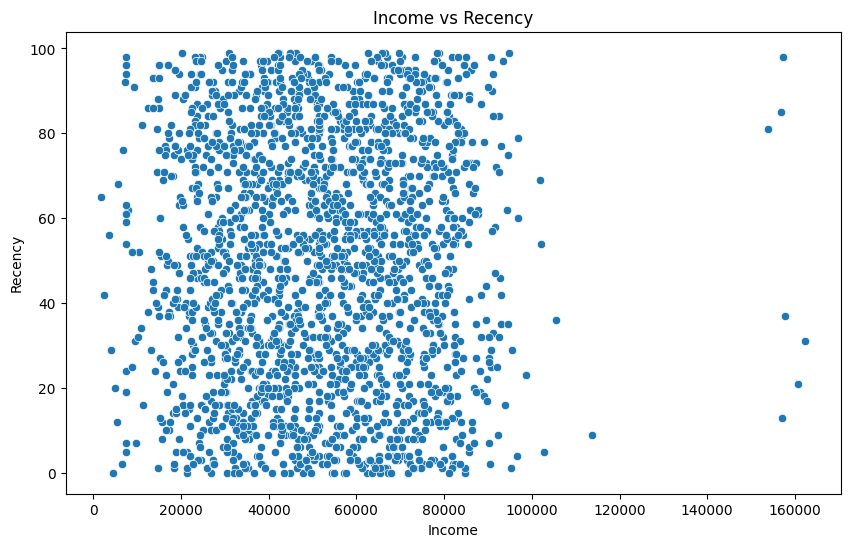

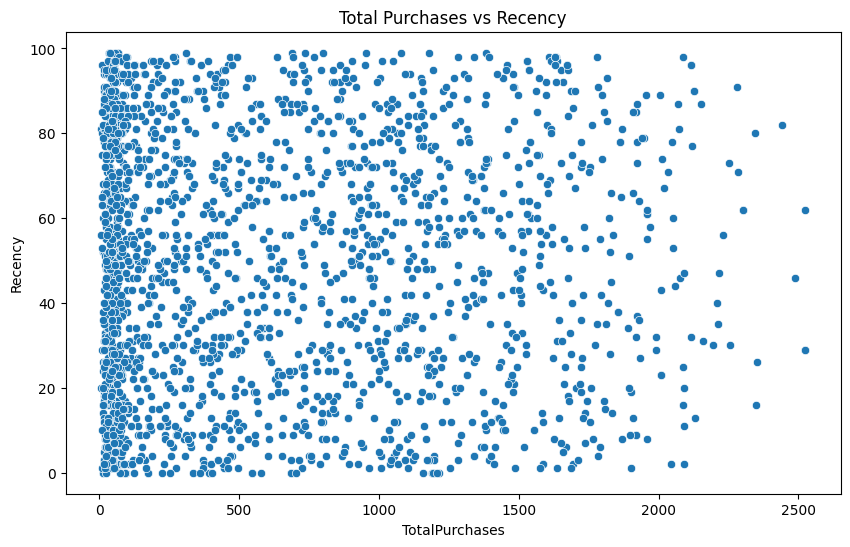

In [22]:
# Distribusi kolom Income
plt.figure(figsize=(10,6))
sns.histplot(df['Income'], kde=True)
plt.title('Distribusi Income')
plt.show()

# Distribusi kolom Recency
plt.figure(figsize=(10,6))
sns.histplot(df['Recency'], kde=True)
plt.title('Distribusi Recency')
plt.show()

# Hubungan antara Income dan Recency
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Income', y='Recency')
plt.title('Income vs Recency')
plt.show()

# Hubungan antara jumlah pembelian dan Recency
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df['TotalPurchases'] = df[product_cols].sum(axis=1)

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='TotalPurchases', y='Recency')
plt.title('Total Purchases vs Recency')
plt.show()


In [23]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,TotalPurchases
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,1,1617
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,0,27
2,4141,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,0,776
3,6182,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,0,53
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,0,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,0,1341
2236,4001,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,0,444
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,0,1241
2238,8235,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,0,843


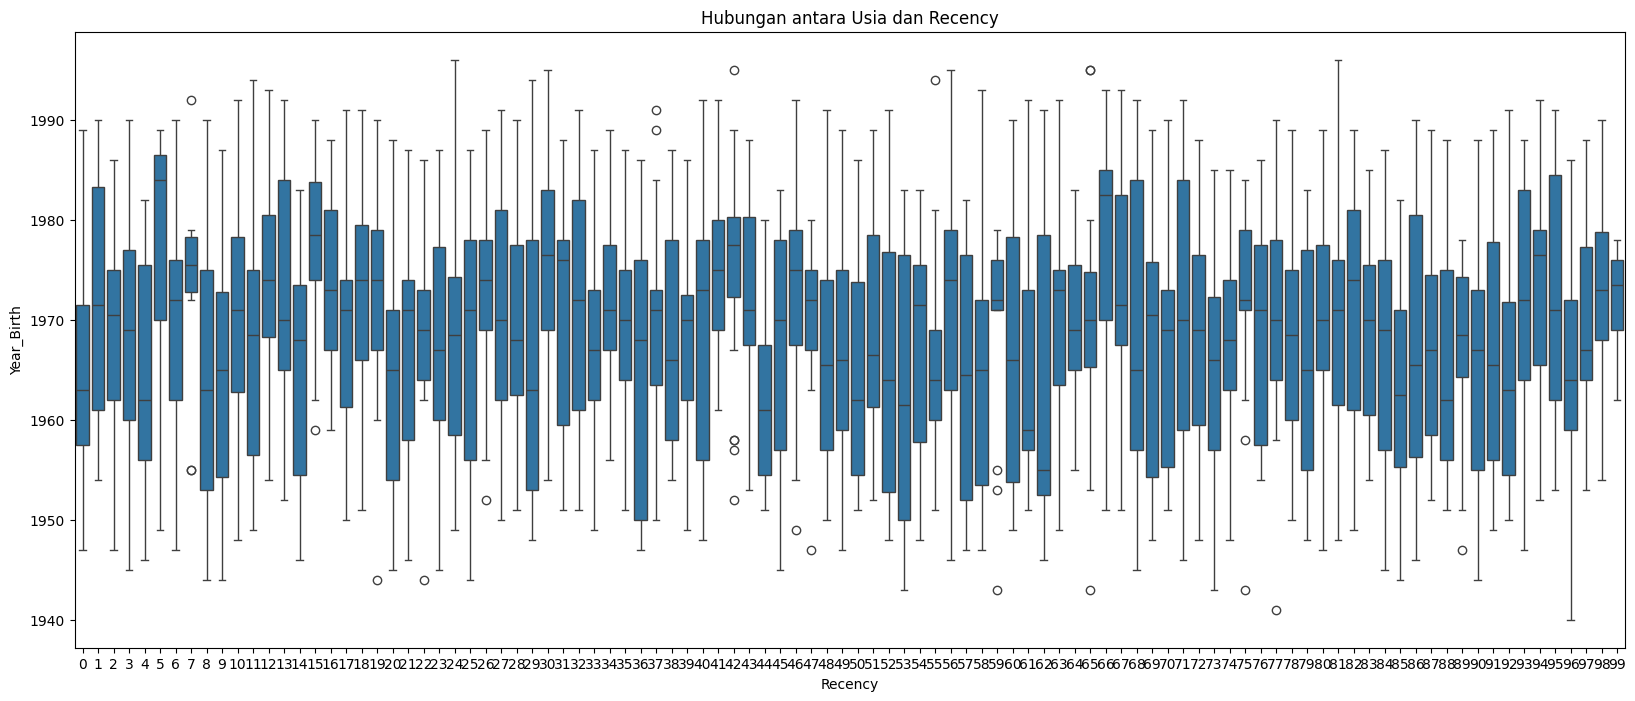

In [28]:
plt.figure(figsize=(20,8))
sns.boxplot(x='Recency', y='Year_Birth', data=df)
plt.title('Hubungan antara Usia dan Recency')
plt.show()


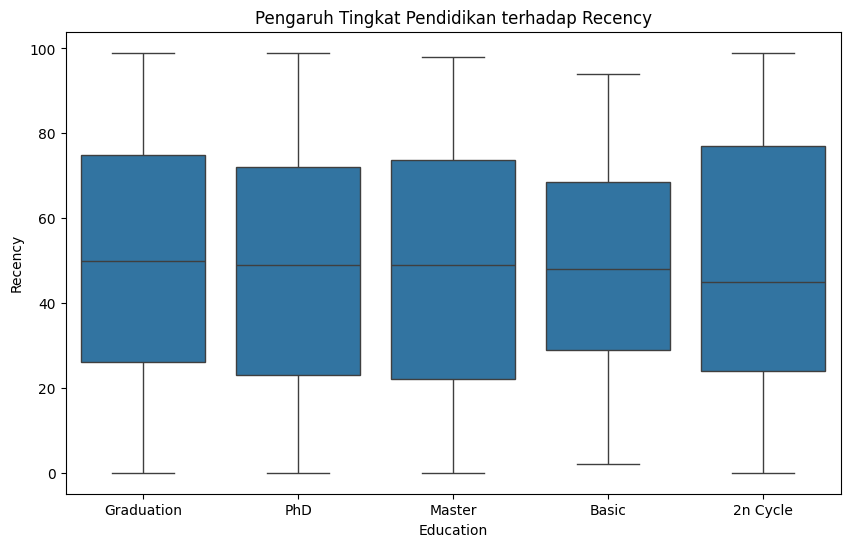

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Education', y='Recency', data=df)
plt.title('Pengaruh Tingkat Pendidikan terhadap Recency')
plt.show()


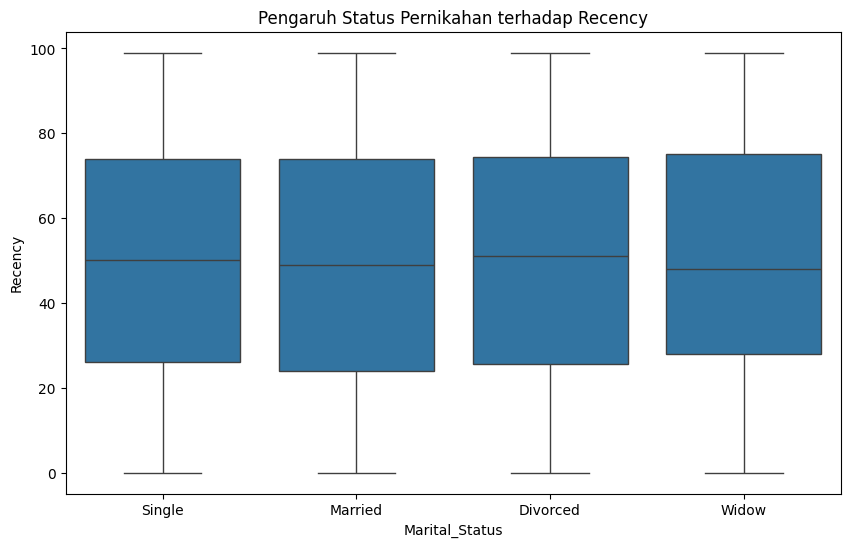

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Marital_Status', y='Recency', data=df)
plt.title('Pengaruh Status Pernikahan terhadap Recency')
plt.show()


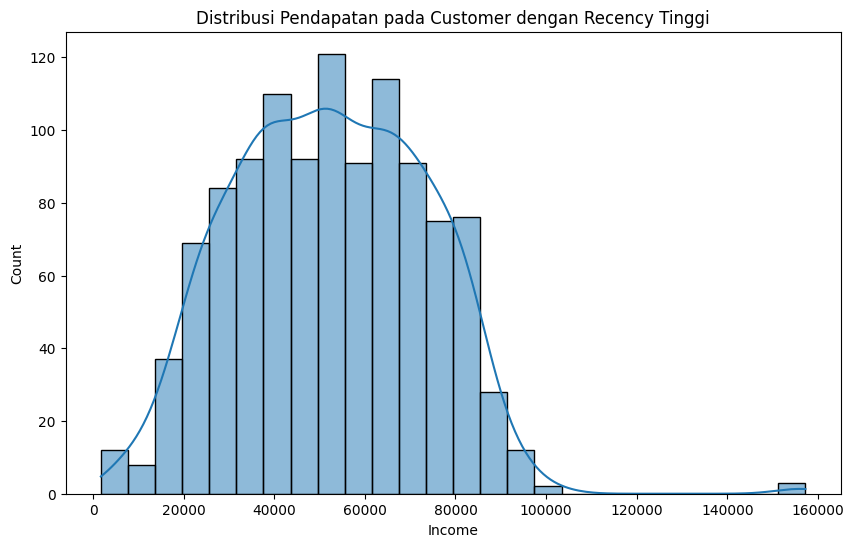

In [31]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['Recency'] > df['Recency'].median()]['Income'], kde=True)
plt.title('Distribusi Pendapatan pada Customer dengan Recency Tinggi')
plt.show()


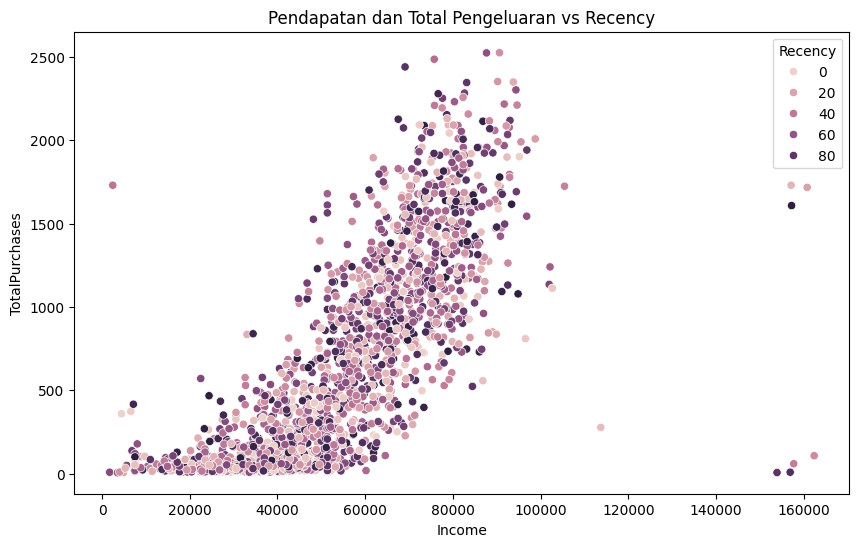

In [32]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Income', y='TotalPurchases', hue='Recency', data=df)
plt.title('Pendapatan dan Total Pengeluaran vs Recency')
plt.show()


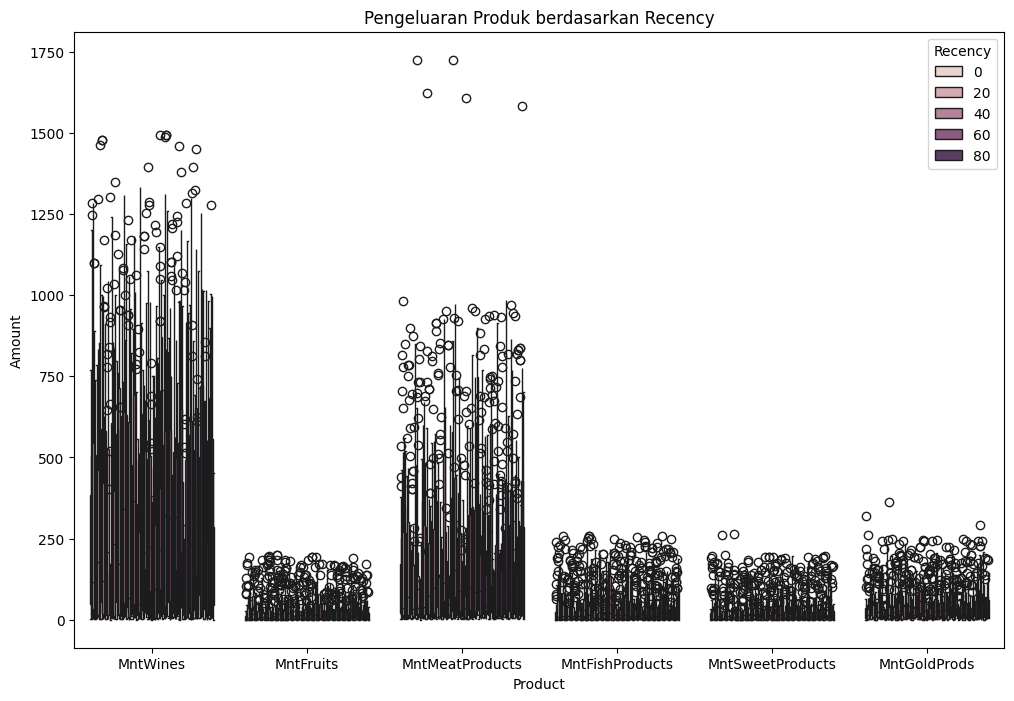

In [33]:
product_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df_melted = df.melt(id_vars=['Recency'], value_vars=product_cols, var_name='Product', value_name='Amount')

plt.figure(figsize=(12,8))
sns.boxplot(x='Product', y='Amount', hue='Recency', data=df_melted)
plt.title('Pengeluaran Produk berdasarkan Recency')
plt.show()


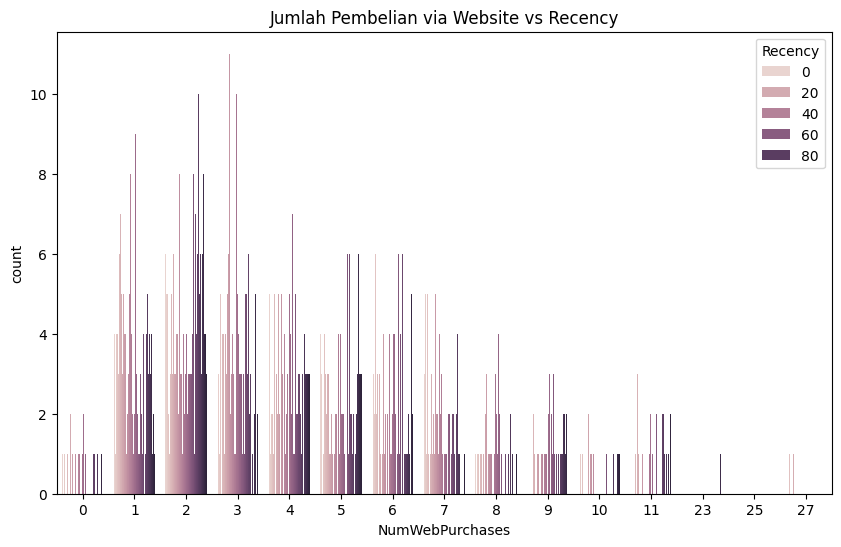

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x='NumWebPurchases', hue='Recency', data=df)
plt.title('Jumlah Pembelian via Website vs Recency')
plt.show()


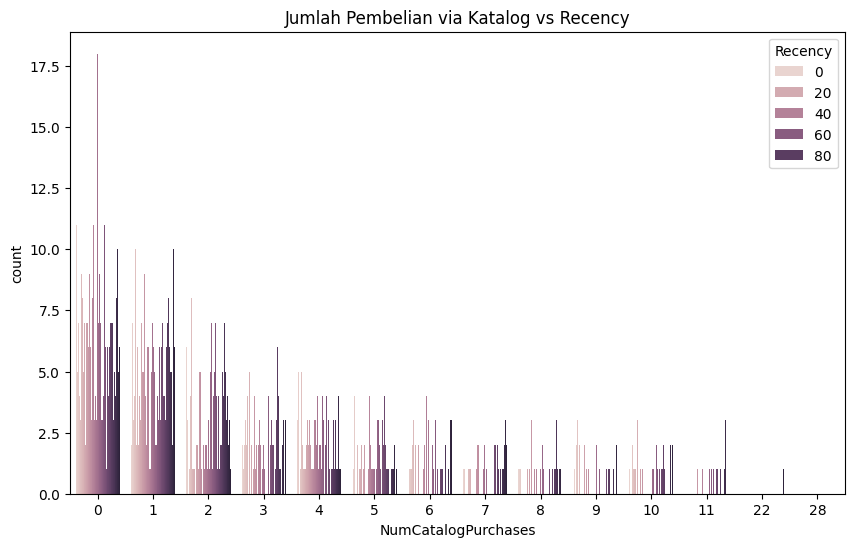

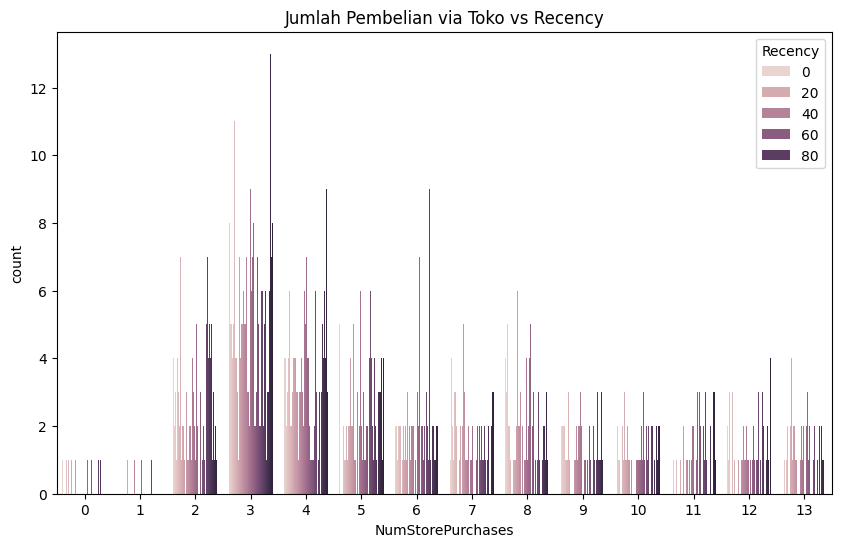

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x='NumCatalogPurchases', hue='Recency', data=df)
plt.title('Jumlah Pembelian via Katalog vs Recency')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(x='NumStorePurchases', hue='Recency', data=df)
plt.title('Jumlah Pembelian via Toko vs Recency')
plt.show()


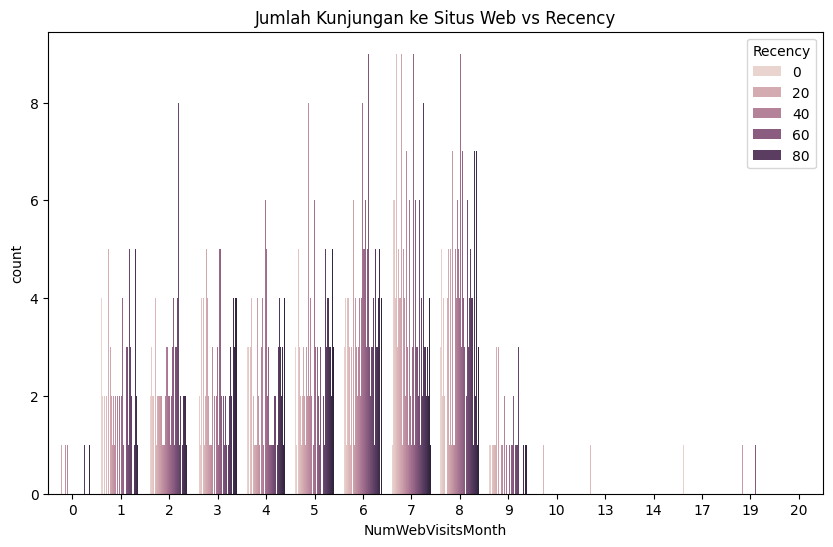

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(x='NumWebVisitsMonth', hue='Recency', data=df)
plt.title('Jumlah Kunjungan ke Situs Web vs Recency')
plt.show()


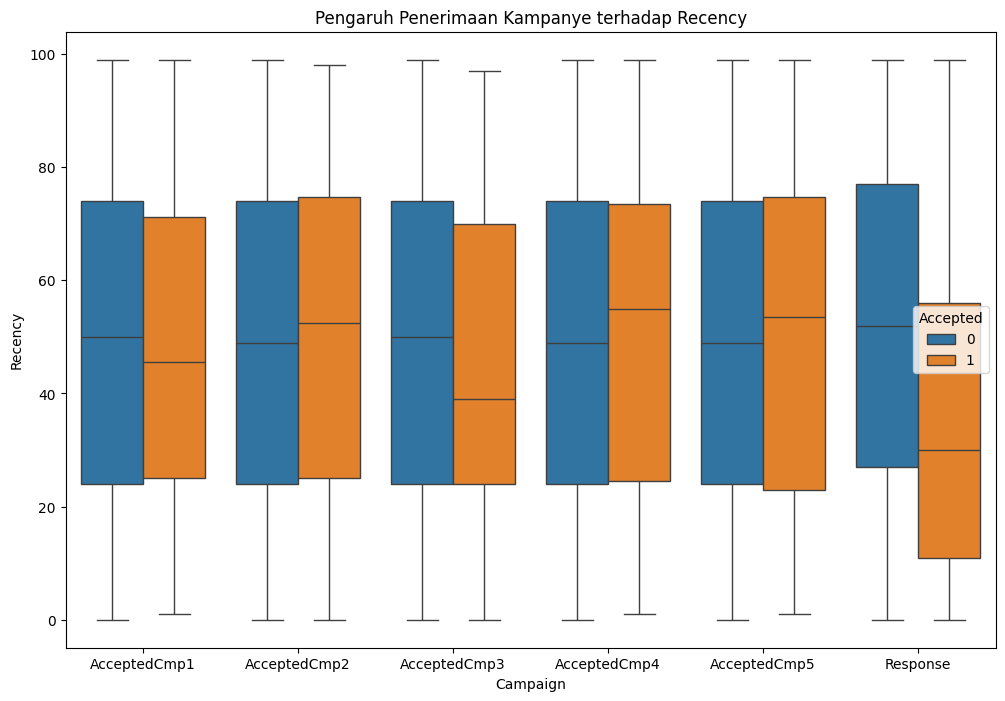

In [37]:
campaign_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']
df_melted = df.melt(id_vars=['Recency'], value_vars=campaign_cols, var_name='Campaign', value_name='Accepted')

plt.figure(figsize=(12,8))
sns.boxplot(x='Campaign', y='Recency', hue='Accepted', data=df_melted)
plt.title('Pengaruh Penerimaan Kampanye terhadap Recency')
plt.show()


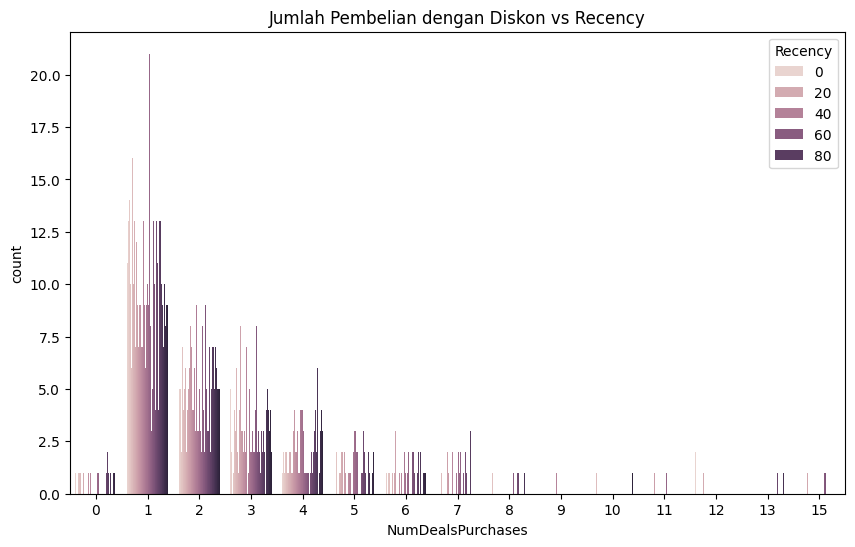

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(x='NumDealsPurchases', hue='Recency', data=df)
plt.title('Jumlah Pembelian dengan Diskon vs Recency')
plt.show()


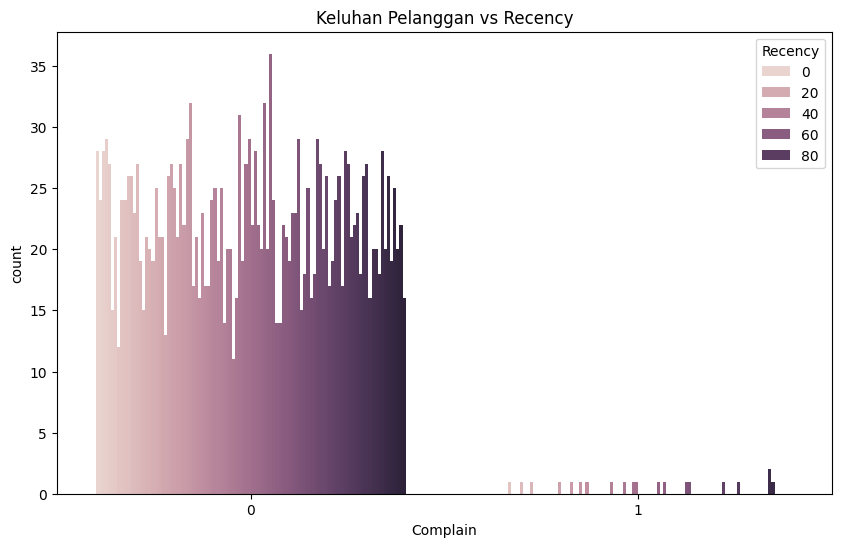

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(x='Complain', hue='Recency', data=df)
plt.title('Keluhan Pelanggan vs Recency')
plt.show()
